# Spam or Not using  **SpaCy**

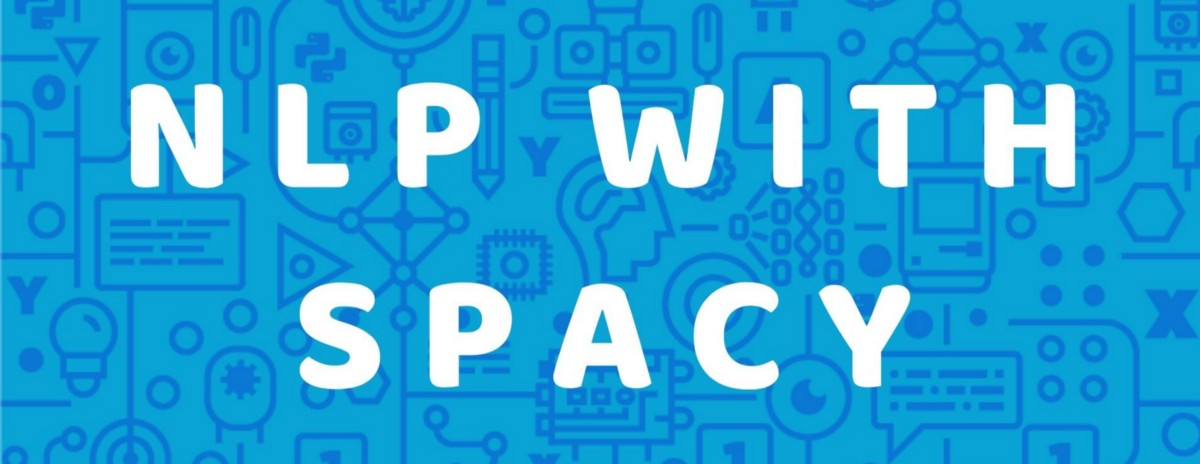

In [55]:
from IPython.display import Image
Image("/content/spacy.jpeg")

## Problem Statement:


[link text](https://)The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. You can find it on Kaggle at the following link: https://www.kaggle.com/uciml/sms-spam-collection-dataset

# why SpaCy??

spaCy is an open-source natural language processing library for Python. It is designed particularly for production use, and it can help us to build applications that process massive volumes of text efficiently.

## Loading Libraries

In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


from sklearn.pipeline import Pipeline

import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import warnings
warnings.filterwarnings("ignore")

## Read the dataset

In [2]:
data = pd.read_csv('/content/SMSSpamCollection.csv',sep='\t',names=['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#for counting ham and spam

data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [4]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Text(0.5, 1.0, 'Distribution of Spam and Ham')

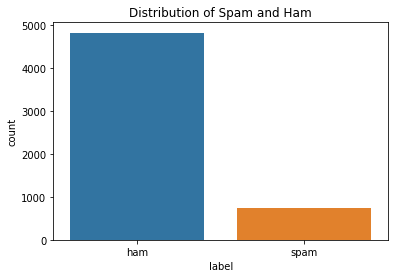

In [9]:
#plotting graph for distribution

sns.countplot(x = "label", data = data)
data.loc[:, 'label'].value_counts()
plt.title('Distribution of Spam and Ham')

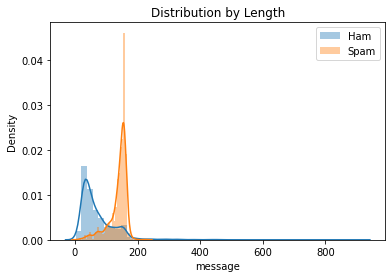

In [12]:
# plotting graph by length.

ham =data[data['label'] == 'ham']['message'].str.len()
sns.distplot(ham, label='Ham')
spam = data[data['label'] == 'spam']['message'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribution by Length')
plt.legend()

##  Clean the data, dropping the stop words and pass through lemmatization

In [16]:
# Create our list of punctuation marks
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
# Create our list of stopwords
nlp = spacy.load('en')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [22]:
def text_data_cleaning(sentence):
  doc=nlp(sentence)

# Lemmatizing each token and converting each token into lowercase
  tokens=[]
  for token in doc:
    if token.lemma_ !="-PRON-":
      temp=token.lemma_.lower().strip()
    else:
      temp=token.lower_
    tokens.append(temp)
  cleaned_tokens=[]
  for token in tokens:
    if token not in stopwords and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens




##Vectorizing the Text

In [33]:
# training the vectorizer 
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)

## Building Classifier

In [35]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()

In [28]:
X=data["message"]
y=data["label"]

In [31]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)


In [32]:
X_train.shape,X_test.shape

((5014,), (558,))

## Creating a Pipeline and Generating the Model using tfidf vectorization

In [36]:
clf=Pipeline([("tfidf",tfidf),("spam_detect_model",spam_detect_model)])

In [37]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7fbc47ebc950>,
                                 use_idf=True, vocabulary=None)),
                ('spam_detect_model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         ve

In [38]:
y_pred=clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}%".format(round((accuracy_score(y_test,y_pred)*100),2)))
print(classification_report(y_test,y_pred))

[[485   0]
 [ 22  51]]
Accuracy Score 96.06%
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       485
        spam       1.00      0.70      0.82        73

    accuracy                           0.96       558
   macro avg       0.98      0.85      0.90       558
weighted avg       0.96      0.96      0.96       558



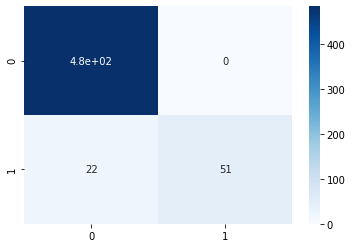

In [41]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues')

##  Test Against New Messages

In [49]:
def pred(msg):
    prediction = clf.predict([msg])
    return print(prediction)

In [54]:
pred("Go until jurong point, crazy")

['ham']
